In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
y_true = np.array([1,1,0,0,1,1,0])
y_predicted = np.array([0.3,0.7,0.9,0.1,0.5,1,0])

In [3]:
def mae(y_true,y_predicted):

    total_mae = 0

    for yt,yp in zip(y_true,y_predicted):
        
        result = abs(yt-yp)
        total_mae+=result

    mae = total_mae / len(y_true)
    print("Total Error : {}".format(total_mae))
    print()
    print("MAE : {}".format(mae))

    return mae

In [4]:
mae_values = mae(y_true,y_predicted)

Total Error : 2.5

MAE : 0.35714285714285715


In [5]:
# Fonksiyonsuz !!!

np.mean(abs(y_true-y_predicted))

0.35714285714285715

In [6]:
def mse(y_true,y_predicted):

    total_mse = 0

    for yt,yp in zip(y_true,y_predicted):

        result = (yt-yp)**2 
        total_mse+=result

    mse = total_mse / len(y_true)
    print("Total MSE : {}".format(round(total_mse,5)))
    print()
    print("MSE : {}".format(round(mse,5)))
    return mse

In [7]:
mse_values = mse(y_true,y_predicted)

Total MSE : 1.65

MSE : 0.23571


In [8]:
# Fonksiyonsuz !!!

np.mean(np.square(y_true-y_predicted))

0.23571428571428574

In [9]:
# RMSE Değeri :
def rmse(y_true,y_predicted):

    return np.sqrt(np.mean((y_true-y_predicted)**2))

In [10]:
rmse_values = rmse(y_true,y_predicted)
rmse_values

0.4855041562276123

In [11]:
def log_loss(y_true,y_predicted, epsilon = 1e-15):

    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,(1-epsilon)) for i in y_predicted_new]

    y_predicted_new = np.array(y_predicted_new)

    # 1.Adım :
    # Şimdi düşünelim np.log(y_predicted) için
    # Eğer y_predicted değerinden biri 0'a sahip olsaydı bizim sonucumuz "inf" çıkardı.
    # Epsilon = 1e-15 diyelim; 0 değerlerimizi epsilon değeri ile değiştirirelim ve max değerlerini alalım. Örnek "max(0,1e-15)" ise bu 1e-15 dönecek 
    # Max dedik sıfır istemiyoruz
    # Yapılan işlemleri yeni y_predicted_new değerlerini ile eşitleyelim

    # 2.Adım:
    # Şimdi de np.log(1-y_predicted) için düşünelim
    # Eğer bu değerlerin içinde 1 değeri olursa nolur ? Yine "inf" değerini alırız biz bunu yine istemeyiz
    # Bu seferde bu değerleri "min(1, (1-epsilon))" ile yerlerini değiştireceğiz. Min dedik 1 istemiyoruz
    # Yine bu değiştirelen değerleri y_predicted_new ile eşitleyelim

    # Ve artık fonksiyonu kullanmaya hazırız !!!!
    # Not : Epsilon değerinin şeçtik çünkü bir değişim yapıcaz buda en küçük epsilon değeri ile olması gerekiyor

    log_loss = -np.mean( (y_true * np.log(y_predicted_new)) + ( (1-y_true)*np.log( (1-y_predicted_new) ) ) )

    return log_loss

In [12]:
y_predicted

array([0.3, 0.7, 0.9, 0.1, 0.5, 1. , 0. ])

In [13]:
log_loss(y_true,y_predicted)

0.6659629339252124

# Gradient Descent

In [14]:
path = "https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/6_gradient_descent/insurance_data.csv"

In [15]:
df = pd.read_csv(path)
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [16]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df[["age", "affordibility"]] , df["bought_insurance"], test_size = 0.2, random_state = 25)

In [17]:
# Biz burda 0 ile 1 arasında değerler isteriz 
# Age Değişecek
# Affordibility Kalabilir 

print("Age For X_train Max Values : {}".format(X_train["age"].max()))
print("Age For X_train Max Values : {}".format(X_train["age"].min()))
print()
print("Affordibility For X_train max Values : {}".format(X_train["affordibility"].max()))
print("Affordibility For X_train Min Values : {}".format(X_train["affordibility"].min()))

Age For X_train Max Values : 62
Age For X_train Max Values : 18

Affordibility For X_train max Values : 1
Affordibility For X_train Min Values : 0


In [18]:
# istersek from sklearn.preprocessing import MinMaxScaler yapabiliriz ama biz burda uğraşmadan direk böldük !!!

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_test_scaled["age"] = X_test_scaled["age"]  / 100
X_train_scaled["age"] = X_train_scaled["age"]  / 100

In [19]:
# İstediğimize ulaştık

print("Age For X_train Max Values : {}".format(X_train_scaled["age"].max()))
print("Age For X_train Max Values : {}".format(X_train_scaled["age"].min()))
print()
print("Affordibility For X_train max Values : {}".format(X_train_scaled["affordibility"].max()))
print("Affordibility For X_train Min Values : {}".format(X_train_scaled["affordibility"].min()))

Age For X_train Max Values : 0.62
Age For X_train Max Values : 0.18

Affordibility For X_train max Values : 1
Affordibility For X_train Min Values : 0


In [20]:
# Tensorflow'dan basit bir işlem yapalım

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [21]:
#(https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/6_gradient_descent/nn.png)

In [22]:
model = Sequential()

model.add(Dense(1, input_shape = (2,), activation = "sigmoid", kernel_initializer="ones", bias_initializer="zeros"))

model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

history = model.fit(X_train_scaled,y_train, epochs = 5000, validation_data = (X_test_scaled, y_test))

Görüntülenen çıkış son 5000 satıra kısaltıldı.
1/1 [==============================] - 0s 30ms/step - loss: 0.5321 - accuracy: 0.7273 - val_loss: 0.4818 - val_accuracy: 0.8333
Epoch 2502/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5321 - accuracy: 0.7273 - val_loss: 0.4817 - val_accuracy: 0.8333
Epoch 2503/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5321 - accuracy: 0.7273 - val_loss: 0.4816 - val_accuracy: 0.8333
Epoch 2504/5000
1/1 [==============================] - 0s 30ms/step - loss: 0.5320 - accuracy: 0.7273 - val_loss: 0.4816 - val_accuracy: 0.8333
Epoch 2505/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5320 - accuracy: 0.7273 - val_loss: 0.4815 - val_accuracy: 0.8333
Epoch 2506/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.5320 - accuracy: 0.7273 - val_loss: 0.4814 - val_accuracy: 0.8333
Epoch 2507/5000
1/1 [==============================] - 0s 39ms/step - loss: 0.5319 - accuracy: 0.7273 - v

In [23]:
# Sonuç oldukça iyi zaten küçük bir veri seti !!!
# Loss Değeri ile Accuracy Değeri

model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 25ms/step - loss: 0.3550 - accuracy: 1.0000


[0.35497748851776123, 1.0]

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
y_pred = model.predict(X_test_scaled)
y_pred

array([[0.70548487],
       [0.3556955 ],
       [0.16827849],
       [0.47801173],
       [0.7260697 ],
       [0.8294984 ]], dtype=float32)

In [26]:
data = pd.DataFrame()
data["Actual"] = y_test
data["Predicted"] = y_pred
data

,Actual,Predicted
2,1,0.705485
10,0,0.355695
21,0,0.168278
11,0,0.478012
14,1,0.726070
9,1,0.829498


In [27]:
# Burda hem coef hem intercept Değerlerini aldık !!!
model.get_weights()

[array([[5.060867 ],
        [1.4086502]], dtype=float32), array([-2.9137027], dtype=float32)]

In [28]:
coef, intercept = model.get_weights()

In [29]:
# This means w1=5.060867, w2=1.4086502, bias =-2.9137027

# age*coef[0] + affordibility*coef[1] + intercept Asıl fonksiyonumuz !!
#    age*w1   +    affordibility*w2   + intercept Asıl fonksiyonumuz !!

# age, affordibility coef değerleri sırasıyla aslında bunlar weights değerlerimiz

coef

array([[5.060867 ],
       [1.4086502]], dtype=float32)

In [30]:
intercept

array([-2.9137027], dtype=float32)

In [31]:
# Activation Functions 
# Basic olarak burda np.array() kullanılmaz

def sigmoid(values):

    import math

    func = 1 / (1 + math.exp(-values))

    return func

In [32]:
def predicted_function(age, affordibility):

    # Değerler Giricek Sonra Activation Function'dan Geçicek !!!

    weigthed_sum = coef[0]*age + coef[1]*affordibility + intercept

    result = sigmoid(weigthed_sum)
    
    return result

In [33]:
predicted_function(.18, 1)

0.35569549781937626

In [34]:
# Gerçek sonuç tabloda 19. index'te
y_train.loc[19,]

0

In [35]:
predicted_function(.47, 1)

0.7054848693136117

In [36]:
# Activation Functions

def sigmoid(values):

    import numpy as np
    
    func = 1 / (1 + np.exp(-values))

    return func

In [37]:
sigmoid(20)

0.9999999979388463

In [38]:
# Tekrardan Yazalım !!!

def log_loss(y_true, y_predicted, epsilon = 1e-15):

    # 0 için
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    # 1 için
    y_predicted_new = [min(i,(1-epsilon)) for i in y_predicted_new]

    # Array Çevir !!
    y_predicted_new = np.array(y_predicted_new)

    log_loss = -np.mean( (y_true*np.log(y_predicted_new)) + ( (1-y_true)*np.log((1-y_predicted_new)) ) )

    return log_loss

In [39]:
log_loss(y_true,y_predicted)

0.6659629339252124

In [40]:
def gradient_descent(age, affordibility, y_true, epochs , loss_threshold = 0.5,learning_rate = 0.5):

    w1=w2=1
    bias = 0
    loss_list = []
    epochs_list = []
    n=len(y_true)
    bias_list = []

    for i in range(epochs):

        # Burda en önemli nokta !!! y_predicted-y_true ;
        # Normalde y_true-y_predicted kullanılır ama burda değil !! Formul diyor !!
        
        # İlk önce bir tahmin edicek
        weights_sum = w1*age + w2*affordibility + bias

        # Sonra Activation Functions'dan Geçiricek
        y_predicted = sigmoid(weights_sum)

        # Loss değerini bulucak biz burda logloss kullanacağız!!!
        loss = log_loss(y_true,y_predicted)
        bias_list.append(bias)
        
        # Weigth Değerlerini Değiştiriyoruz # Türev Kısmı
        # np.dot([1,2,3,4],[3,4,5,6]) --- > 50 Değeri Çıkar. (Çarpıp sonra Toplar)
        # Yani vektörlerin iç çarpımı !!!! (1 boyutlu çıktıkları için !!!)

        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
        w2d = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))
        
        # Bias Değerini Değiştiriyoruz
        bd  = (1/n)*(np.sum(y_predicted-y_true))
        
        w1 = w1 - learning_rate*w1d
        w2 = w2 - learning_rate*w2d
        bias = bias - learning_rate*bd
        
        loss_list.append(loss)
        epochs_list.append(i)

        if i % 10 == 0:

            print(f"Epoch : {i:{10}}, w1 : {round(w1,4):{10}}, w2 : {round(w2,4):{10}}, bias : {round(bias,4):{10}}, loss : {round(loss,4)}")

        if loss <= loss_threshold:
            print()
            print("Loss Threshold >= Loss")
            print("BREAK")
            break

    return w1,w2,bias,loss_list,epochs_list,bias_list

In [41]:
w1,w2,bias,loss_list,epochs_list,bias_list = gradient_descent(X_train_scaled["age"], X_train_scaled["affordibility"], y_train, epochs = 1000, loss_threshold=0.4631, learning_rate = 0.5)

Epoch :          0, w1 :     0.9749, w2 :     0.9483, bias :    -0.1134, loss : 0.7113
Epoch :         10, w1 :     0.9521, w2 :     0.8002, bias :    -0.6768, loss : 0.6052
Epoch :         20, w1 :     1.0748, w2 :     0.8785, bias :    -0.8714, loss : 0.5924
Epoch :         30, w1 :     1.2163, w2 :     0.9684, bias :    -1.0069, loss : 0.583
Epoch :         40, w1 :     1.3599, w2 :      1.045, bias :    -1.1249, loss : 0.5749
Epoch :         50, w1 :     1.5033, w2 :     1.1084, bias :    -1.2319, loss : 0.5676
Epoch :         60, w1 :     1.6458, w2 :     1.1607, bias :    -1.3302, loss : 0.561
Epoch :         70, w1 :      1.787, w2 :     1.2039, bias :    -1.4212, loss : 0.5549
Epoch :         80, w1 :     1.9267, w2 :     1.2396, bias :    -1.5061, loss : 0.5493
Epoch :         90, w1 :     2.0646, w2 :     1.2694, bias :    -1.5857, loss : 0.544
Epoch :        100, w1 :     2.2007, w2 :     1.2942, bias :    -1.6607, loss : 0.5391
Epoch :        110, w1 :     2.3348, w2 :     

In [42]:
def graph_loss(epochs_list,loss_list,title = ""):

    plt.figure(figsize = (15,8))
    plt.plot(epochs_list,loss_list)
    size = 15
    plt.title(title, fontsize = size)
    plt.xlabel("Epochs Values", fontsize = size)
    plt.ylabel("Loss Values" , fontsize = size )
    plt.show()


In [43]:
w1, w2, bias

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

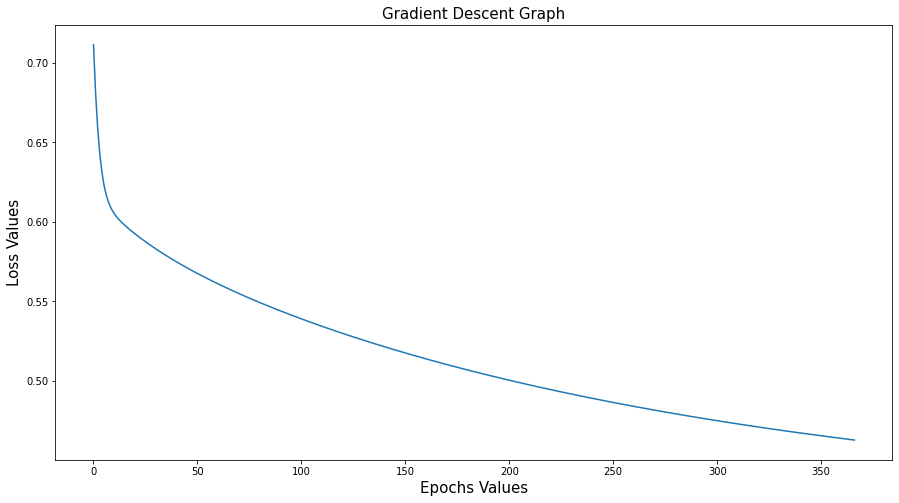

In [44]:
graph_loss(epochs_list, loss_list,"Gradient Descent Graph")

In [49]:
np.ones(shape = 2).shape,X_train_scaled.T.shape

((2,), (2, 22))

In [50]:
X_train_scaled.T.shape,y_train.shape

((2, 22), (22,))

In [51]:
def all_gradient_descent(X, y_true, epochs = 1000, learning_rate = 0.5, loss_threshold=0.4631):
    
    epochs_list = []
    loss_list = []
    
    number_of_features = X_train_scaled.shape[1]
    
    w = np.ones(shape = (number_of_features,))
    
    bias = 0
    
    n = X.shape[0]

    for i in range(epochs):

        # Y_predicted - y_true

        weights_sum = np.dot(w,X.T) + bias

        y_predicted = sigmoid(weights_sum)

        loss = log_loss(y_true, y_predicted) 

        loss_list.append(loss)
        epochs_list.append(i)

        w_der = (1/n) * (np.dot(X.T, (y_predicted-y_true)))
        b_der = (1/n) * sum(y_predicted-y_true)

        w = w - learning_rate*w_der
        bias = bias - learning_rate*b_der

        

        if loss_threshold >= loss :
            print()
            print("Loss Threshold >= Loss")
            print("BREAK")
            print()
            break

    print(f"Final Weights and Bias :\nWeights : {w}, Bias : {bias}")


    return w, bias, loss_list,epochs_list

In [52]:
w_all,bias_all, loss_list_all,epochs_list_all = all_gradient_descent(X_train_scaled, y_train, epochs = 1000, learning_rate = 0.5, loss_threshold = 0.4631)


Loss Threshold >= Loss
BREAK

Final Weights and Bias :
Weights : [5.05104762 1.45697945], Bias : -2.9596534546250037


In [53]:
w_all,bias_all

(array([5.05104762, 1.45697945]), -2.9596534546250037)

In [54]:
# Bire bir aynı sonuç !!!!

w1,w1,bias

(5.051047623653049, 5.051047623653049, -2.9596534546250037)

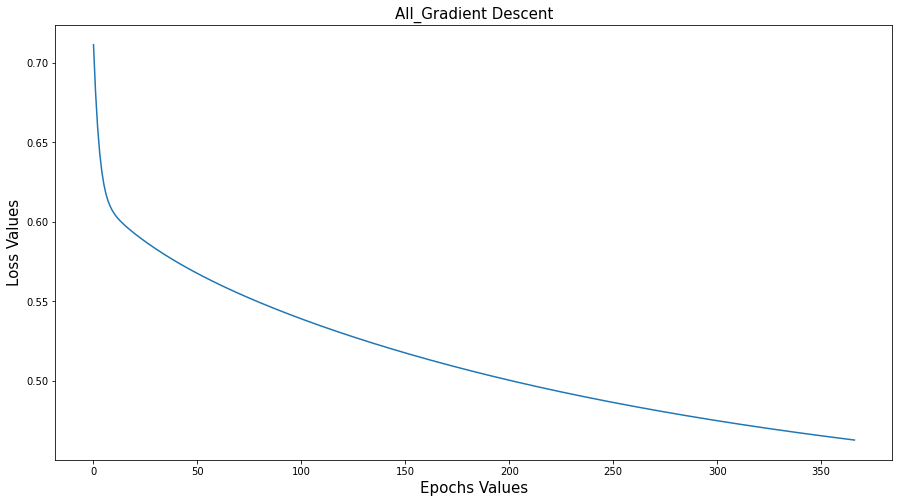

In [55]:
graph_loss(epochs_list_all,loss_list_all, "All_Gradient Descent")

In [56]:
# Biz bunu bir class yapısına çevirielim !!!

# Bu işlem aslında Logistic Regression için yazılan bir class

class MyGD:

    def __init__(self):

        self.w = None
        self.bias = None
        self.loss_list = []
        self.epochs_list = []


    def fit(self,X, y_true, epochs , learning_rate, loss_threshold):

        self.w, self.bias,self.loss_list, self.epochs_list = self.gradient_descent(X, y_true, epochs, learning_rate, loss_threshold)

        print(f"Final Weights and Bias :\nWeights : {self.w}, Bias : {self.bias}")

    def predict(self,X_test):

        values_ = np.dot(self.w, X_test.T) + self.bias
        predicted_values = sigmoid(values_)
        return predicted_values
    
    def loss_graph(self,title):

        plt.figure(figsize = (15,8))
        plt.plot(self.epochs_list,self.loss_list)
        size = 15
        plt.title(title, fontsize = size)
        plt.xlabel("Epochs Values", fontsize = size)
        plt.ylabel("Loss Values" , fontsize = size )
        plt.show()

    def sigmoid(self, values):

        import numpy as np
        
        func = 1 / (1 + np.exp(-values))
        
        return func

    def gradient_descent(self, X, y_true , epochs, learning_rate, loss_threshold):

        number_of_features = X.shape[1]
        n = X.shape[0]
        bias = 0
        w = np.ones(shape = (number_of_features,))
        epochs_list = []
        loss_list = []

        for i in range(epochs):

            # w shape : (2,) X shape : (20,2)

            weights_sum = np.dot(w , X.T) + bias
            y_predicted = sigmoid(weights_sum)

            loss = log_loss(y_true, y_predicted)

            loss_list.append(loss)
            epochs_list.append(i)

            # X shape : (20,2 ) T ile (2,20) , (y_predict-y_true) shape(20,)

            wd = (1 / n) * (np.dot(X.T, (y_predicted-y_true)))
            bd = np.mean(y_predicted-y_true)

            w = w - learning_rate*wd
            bias = bias - learning_rate*bd

            if loss_threshold >= loss :
                print()
                print("Loss Threshold >= Loss")
                print("BREAK")
                print()
                break

        return w , bias, loss_list,epochs_list


In [57]:
customModel = MyGD()

In [58]:
customModel.fit(X_train_scaled, y_train, epochs = 1000, learning_rate = 0.5, loss_threshold = 0.4631)


Loss Threshold >= Loss
BREAK

Final Weights and Bias :
Weights : [5.05104762 1.45697945], Bias : -2.9596534546250037


In [59]:
w_all,bias_all

(array([5.05104762, 1.45697945]), -2.9596534546250037)

In [60]:
w1,w2,bias

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [61]:
customModel.predict(X_test_scaled)

array([0.70501995, 0.35583554, 0.16159866, 0.4779192 , 0.72558553,
       0.82898702])

In [62]:
# Custom Model'den gelme 

yt = np.array([0.18,1])
customModel.predict(yt)

0.35583553560647946

In [63]:
# Bu Base Model'den gelme !!!

predicted_function(.18, 1)[0]

0.3556955

In [64]:
# Bizim normalde tensorflow'dan yapmış olduğumuz!!!

weigth_bias = model.get_weights()
base_w1,base_w2 = weigth_bias[0]
base_bias = weigth_bias[1]

print(f"Model Weights and Bias :\nw1 : {str(base_w1[0]):{10}},w2 : {str(base_w2[0]):{10}},bias : {str(base_bias[0]):{10}}")

Model Weights and Bias :
w1 : 5.060867  ,w2 : 1.4086502 ,bias : -2.9137027


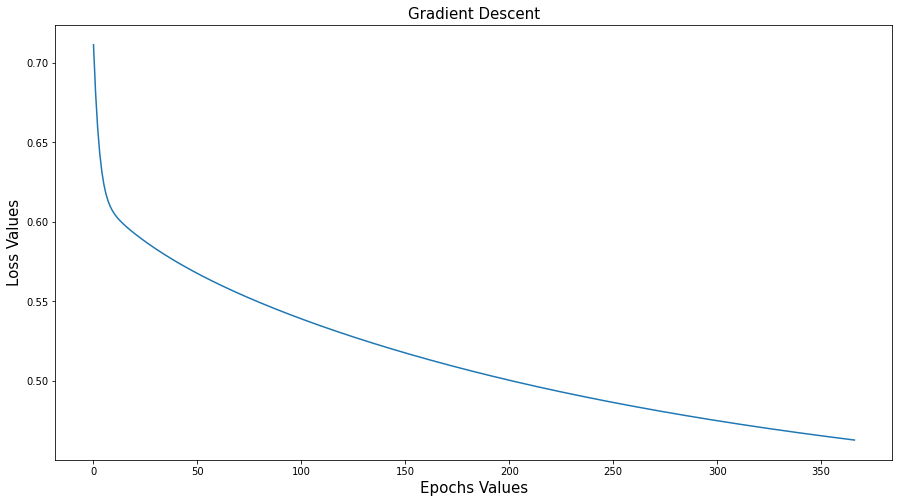

In [65]:
customModel.loss_graph("Gradient Descent")

In [66]:
last_data = pd.DataFrame()

last_data["CustomModel Predicted"] = customModel.predict(X_test_scaled)
last_data["Tensorflow Predicted"] = model.predict(X_test_scaled)

last_data

,CustomModel Predicted,Tensorflow Predicted
0,0.705020,0.705485
1,0.355836,0.355695
2,0.161599,0.168278
3,0.477919,0.478012
4,0.725586,0.726070
5,0.828987,0.829498
